### in this file we will plot different types of plots to visualize model properties

In [ ]:
# Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  #  Needed for heatmap

In [ ]:
# Define base directories
ml_dir = "CrossValidation/ML"
dl_dir = "CrossValidation/DL"

# Function to Load Cross-Validation Results
def load_cv_results(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith("_cross_val_results.npy"):  # Load only result files
            model_name = filename.replace("_cross_val_results.npy", "")
            file_path = os.path.join(directory, filename)
            loaded_data = np.load(file_path, allow_pickle=True)
            
            if isinstance(loaded_data, np.ndarray) and loaded_data.size == 1:
                results[model_name] = loaded_data.item()  # Extract dictionary if stored as single object
            else:
                results[model_name] = {"val_acc": loaded_data}  # Store array under 'val_acc' key
    return results

In [ ]:
# Load ML and DL Cross-Validation Results
ml_results = load_cv_results(ml_dir)
dl_results = load_cv_results(dl_dir)

In [ ]:
# Function to Extract Validation Metrics
def extract_validation_metrics(results):
    metrics = {}
    for model, data in results.items():
        val_acc = data.get("val_acc", [])  # Default to empty list if missing
        val_loss = data.get("val_loss", [])  # Default to empty list if missing

        mean_acc = np.mean(val_acc) if len(val_acc) > 0 else np.nan
        std_acc = np.std(val_acc) if len(val_acc) > 0 else np.nan
        mean_loss = np.mean(val_loss) if len(val_loss) > 0 else np.nan
        std_loss = np.std(val_loss) if len(val_loss) > 0 else np.nan

        metrics[model] = {
            "mean_accuracy": mean_acc,
            "std_accuracy": std_acc,
            "mean_loss": mean_loss,
            "std_loss": std_loss,
            "val_acc": val_acc,  # Keep raw validation accuracies for boxplot
        }
    return metrics

In [ ]:
# Extract Metrics
ml_metrics = extract_validation_metrics(ml_results)
dl_metrics = extract_validation_metrics(dl_results)

# Combine ML & DL metrics into a single dictionary
all_metrics = {**ml_metrics, **dl_metrics}

# Ensure that **all 8 models** are being loaded
expected_models = {"KNN", "LogisticRegression", "NaiveBayes", "RandomForest", "SVM", 
                   "CNN_PyTorch", "CNN_TensorFlow", "DNN_TensorFlow"}
missing_models = expected_models - set(all_metrics.keys())
if missing_models:
    print(f"⚠️ Warning: The following models are missing from the results: {missing_models}")

# Convert to sorted list based on accuracy
sorted_metrics = sorted(all_metrics.items(), key=lambda x: x[1]["mean_accuracy"], reverse=True)

#  Remove NaN values
filtered_metrics = [(m, d["mean_accuracy"]) for m, d in sorted_metrics if not np.isnan(d["mean_accuracy"])]

#  Ensure unpacking is safe
all_models, all_acc = zip(*filtered_metrics) if filtered_metrics else ([], [])

#  Heatmap Data (Validation Accuracy Matrix)
matrix_data = {model: data["mean_accuracy"] for model, data in all_metrics.items()}
matrix_df = pd.DataFrame.from_dict(matrix_data, orient="index", columns=["Mean Accuracy"])
matrix_df = matrix_df.sort_values(by="Mean Accuracy", ascending=False)  # Sort for better visualization

⚠️ Warning: The following models are missing from the results: {'CNN_TensorFlow', 'DNN_TensorFlow'}


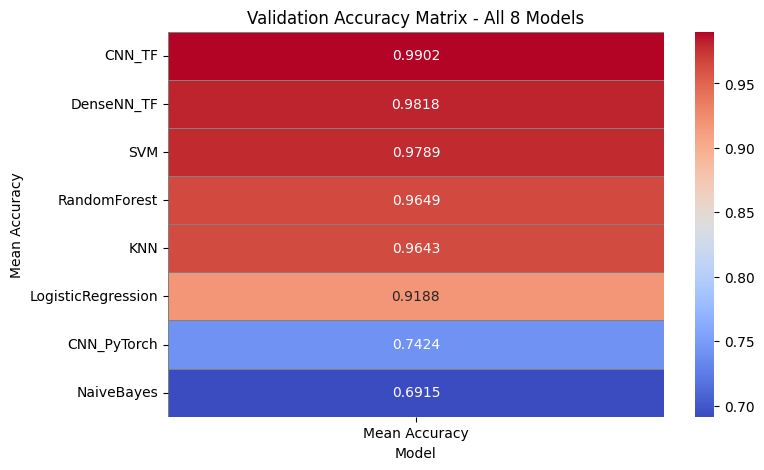

In [ ]:
# **1. Validation Accuracy Matrix (Heatmap)**
plt.figure(figsize=(8, 5))
sns.heatmap(matrix_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5, linecolor="gray")
plt.title("Validation Accuracy Matrix - All 8 Models")
plt.xlabel("Model")
plt.ylabel("Mean Accuracy")
plt.show()

C:\Users\RONIT\AppData\Local\Temp\ipykernel_13780\1939561132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_models, y=all_acc, palette="viridis")


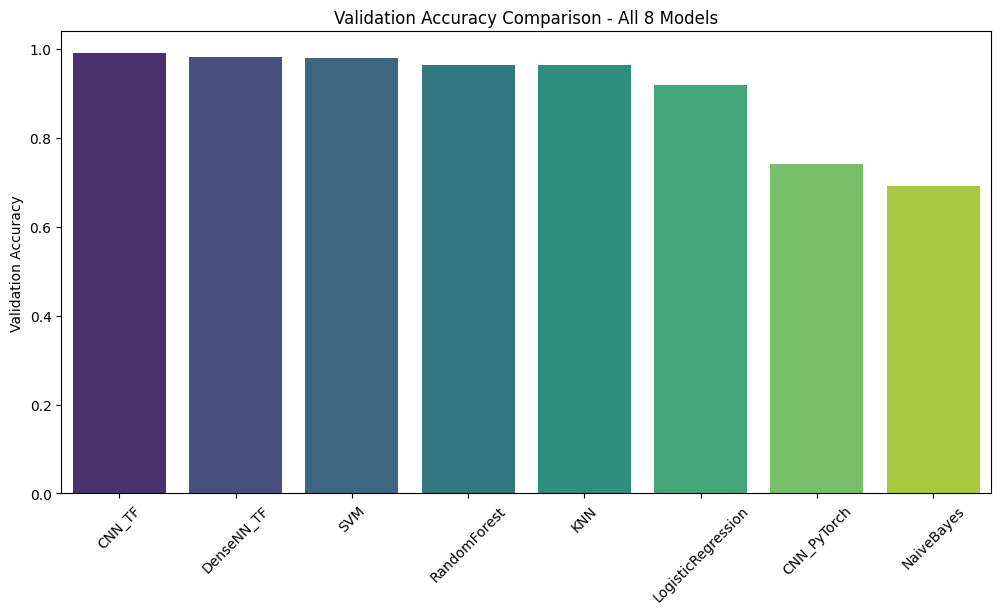

In [ ]:
# **2. Bar Plot - Accuracy Comparison (All 8 Models)**
plt.figure(figsize=(12, 6))
sns.barplot(x=all_models, y=all_acc, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison - All 8 Models")
plt.show()

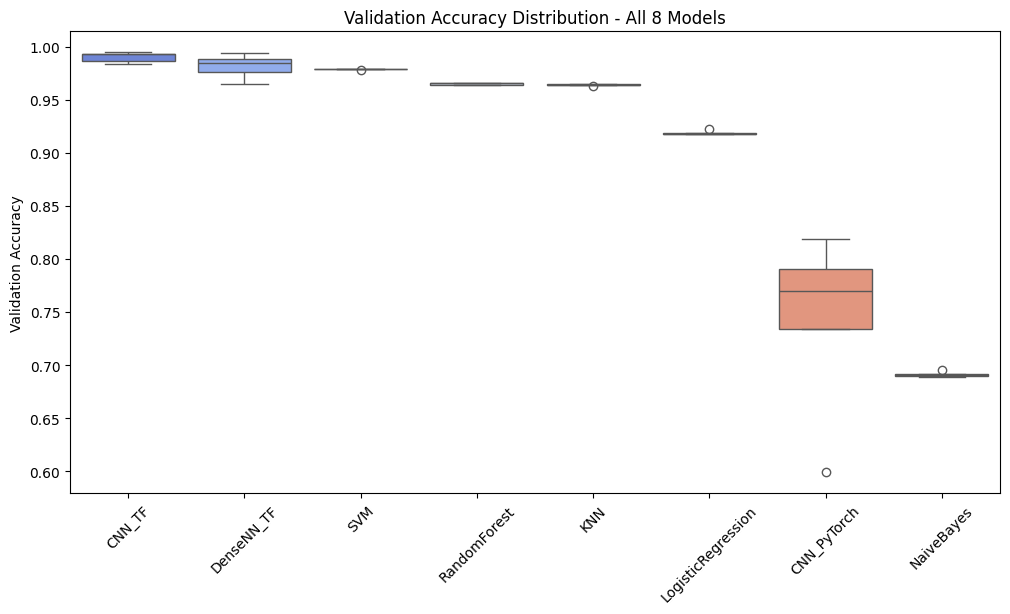

In [ ]:
# **3. Boxplot - Accuracy Distribution (All 8 Models)**
plt.figure(figsize=(12, 6))
data_for_boxplot = [all_metrics[model]["val_acc"] for model in all_models]
sns.boxplot(data=data_for_boxplot, palette="coolwarm")
plt.xticks(range(len(all_models)), all_models, rotation=45)
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Distribution - All 8 Models")
plt.show()

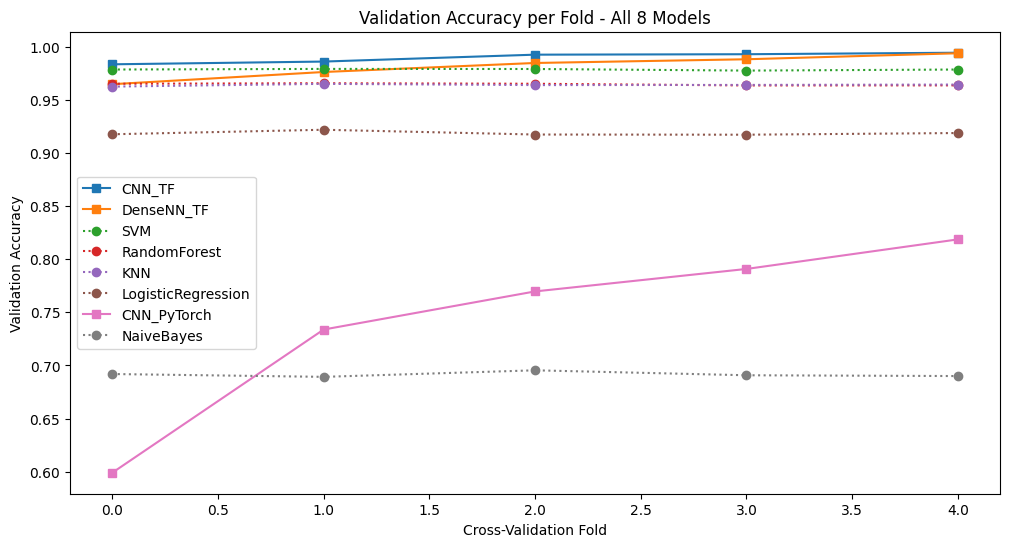

In [ ]:
# **4. Line Graph - Accuracy per Fold (All 8 Models)**
plt.figure(figsize=(12, 6))
for model in all_models:
    data = all_metrics[model]
    if "val_acc" in data and len(data["val_acc"]) > 0:
        linestyle = "dotted" if model in ml_metrics else "solid"
        marker = "o" if model in ml_metrics else "s"
        plt.plot(data["val_acc"], label=model, linestyle=linestyle, marker=marker)
plt.ylabel("Validation Accuracy")
plt.xlabel("Cross-Validation Fold")
plt.title("Validation Accuracy per Fold - All 8 Models")
plt.legend()
plt.show()